<a href="https://colab.research.google.com/github/Ekta193/Ekta-Fin/blob/main/task1_imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TechnoHacks**
Task 1: *Image Classification*
(UsING the CIFAR-10 dataset to build a model
that can classify images into 10 different
categories)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

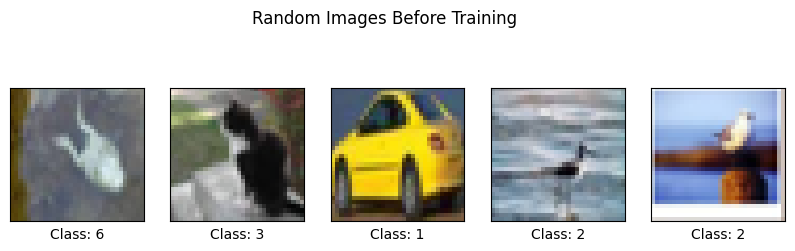

In [ ]:
# Visualize random images before training
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = np.random.randint(0, len(train_images))
    plt.imshow(train_images[index])
    plt.xlabel(f"Class: {train_labels[index][0]}")
plt.suptitle("Random Images Before Training")
plt.show()


In [ ]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.5422 - accuracy: 0.4377 - val_loss: 1.2562 - val_accuracy: 0.5469
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1812 - accuracy: 0.5830 - val_loss: 1.1188 - val_accuracy: 0.6098
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0257 - accuracy: 0.6408 - val_loss: 1.0228 - val_accuracy: 0.6441
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9271 - accuracy: 0.6758 - val_loss: 0.9777 - val_accuracy: 0.6659
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8569 - accuracy: 0.7008 - val_loss: 0.9174 - val_accuracy: 0.6847
Epoch 6/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7869 - accuracy: 0.7253 - val_loss: 0.8977 - val_accuracy: 0.6925
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7413 - accuracy: 0.7407 - val_loss: 0.8635 -

Text(0.5, 1.0, 'Training History')

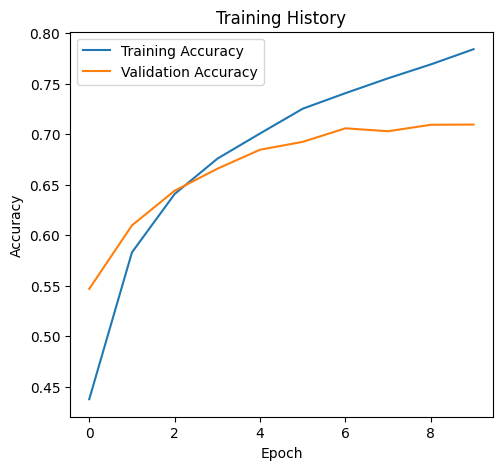

In [ ]:
# Visualize training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training History")

313/313 [==============================] - 5s 16ms/step


<ipython-input-9-98f2249e926b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, i + 1)


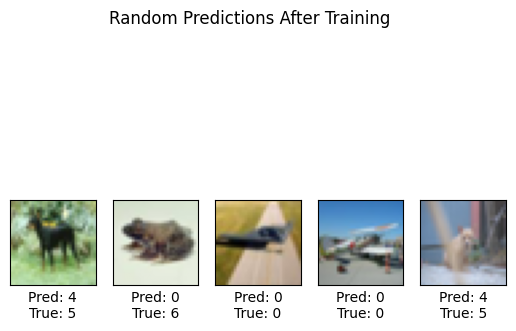

In [ ]:
# Visualize random predictions after training
predictions = model.predict(test_images)
plt.subplot(1, 2, 2)
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = np.random.randint(0, len(test_images))
    plt.imshow(test_images[index])
    predicted_label = np.argmax(predictions[index])
    true_label = test_labels[index][0]
    plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}")
plt.suptitle("Random Predictions After Training")
plt.show()